In [58]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import warnings

import re
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
warnings.filterwarnings('ignore')

# Scrape data

In [2]:
def scrape(urls: list, 
           columns: list,
           exam_year: str,
           table_offset: int, 
           tr_offset_first: int, 
           tr_offset_last: int,
           td_offset_first: int,
           td_offset_last: int):
    
    dfs = []
    
    for url in urls:
        # Make request
        response = requests.get(url)
        content = response.content.decode('utf-8')

        # Make soup 
        soup = BeautifulSoup(content, 'html.parser')

        # Get table
        table = soup.find_all('table')[table_offset]

        # Get rows
        trs = table.find_all('tr')[tr_offset_first : tr_offset_last]

        # Get values
        results = []
        for tr in trs:
            # init new dict
            result = {}

            # get value list
            tds = tr.find_all('td')[td_offset_first : td_offset_last]

            for k, td in zip(columns, tds):
                result[k] = td.text.strip()

            # append to master result
            results.append(result)

        # Convert to DataFrame
        df = pd.DataFrame(results)
        df['exam_year'] = exam_year
        dfs.append(df)
        
    df = pd.concat(dfs)
        
    return df

In [3]:
df_2013 = scrape(urls=['https://dantri.com.vn/giao-duc-huong-nghiep/danh-sach-top-100-thu-khoa-co-diem-thi-cao-nhat-nuoc-1375813644.htm'],           
                 columns=['rank', 'uni', 'name', 'dob', 'subject1', 'subject2', 'subject3', 'total'],
                 exam_year='2013',
                 table_offset=0, 
                 tr_offset_first=2, 
                 tr_offset_last=None,
                 td_offset_first=None,
                 td_offset_last=-1)

In [4]:
df_2013.head()

,rank,uni,name,dob,subject1,subject2,subject3,total,exam_year
0,1,BKA,Nguyễn Thành Trung,18-02-94,"10,00","09,75","10,00","29,75",2013
1,2,BKA,Vũ Đức Thuận,08-12-95,"10,00","09,50","10,00","29,50",2013
2,3,YTB,Lương Thùy Dương,07-05-95,"10,00","10,00","09,50","29,50",2013
3,4,YHB,Nguyễn Hải Linh,07-04-95,"10,00","09,75","09,75","29,50",2013
4,5,YHB,Phạm Hùng Cường,10-12-95,"09,75","09,75","10,00","29,50",2013


In [5]:
df_2014 = scrape(urls=['https://thi.tuyensinh247.com/top-100-thi-sinh-co-diem-thi-dai-hoc-cao-nhat-nuoc-nam-2014-c24a18276.html'],           
                 columns=['rank', 'uni', 'name', 'dob', 'code', 'city', 'subject1', 'subject2', 'subject3', 'bonus', 'total'],
                 exam_year='2014',
                 table_offset=0, 
                 tr_offset_first=2, 
                 tr_offset_last=None,
                 td_offset_first=None,
                 td_offset_last=None)

In [6]:
df_2014.head()

,rank,uni,name,dob,code,city,subject1,subject2,subject3,bonus,total,exam_year
0,1,NTH,Phạm Đức Toàn,31-07-96,A\n2519,,0975,0950,1000,,2925,2014
1,2,NTT,Nguyễn Thái Khang,31-07-96,B\n10598,02,1000,0975,0950,,2925,2014
2,3,YHB,Lê Bá Tùng,70-99-6,B\n7998,,0975,1000,0950,,2925,2014
3,4,YDS,Tống Hữu Nhân,01-01-96,B\n30086,57,1000,1000,0925,,2925,2014
4,5,YHB,Nguyễn Văn Tuân,41-09-6,B\n7685,,1000,1000,0900,,2900,2014


In [7]:
df_2012 = scrape(urls=['https://vtc.vn/100-hoc-sinh-co-diem-thi-cao--nhat-toan-quoc-ar86893.html'],           
                 columns = ['rank', 'uni', 'name', 'dob', 'code', 'city', 'subject1', 'subject2', 'subject3', 'bonus', 'total'],
                 exam_year='2012',
                 table_offset=0, 
                 tr_offset_first=2, 
                 tr_offset_last=None,
                 td_offset_first=None,
                 td_offset_last=None)

In [8]:
df_2012.head()

,rank,uni,name,dob,code,city,subject1,subject2,subject3,bonus,total,exam_year
0,1,YDS,Nguyễn Kim Phượng,04-09-94,B 18362,42,1000,1000,1000,,3000,2012
1,2,YHB,Trần Xuân Bách,25-09-94,B 818,1B,1000,1000,0975,,2975,2012
2,3,YDS,Dư Quốc Minh Quân,06-04-94,B 2402,02,0950,1000,1000,,2950,2012
3,4,YHB,Phạm Đức Thịnh,28-11-94,B 9718,21,0975,1000,0950,,2925,2012
4,5,CCP,Nguyễn Anh Kiệt,02-01-94,A 732,39,0975,1000,0950,,2925,2012


In [9]:
df_2016 = scrape(urls=['https://thi.tuyensinh247.com/top-100-thi-sinh-diem-cao-nhat-khoi-a-nam-2016-c24a29327.html',
                       'https://thi.tuyensinh247.com/top-100-thi-sinh-co-diem-thi-khoi-a1-cao-nhat-nam-2016-c24a29328.html',
                       'https://thi.tuyensinh247.com/danh-sach-100-thi-sinh-co-diem-cao-nhat-khoi-b-nam-2016-c24a29329.html',
                       'https://thi.tuyensinh247.com/top-100-thi-sinh-co-diem-thi-cao-nhat-khoi-d1-nam-2016-c24a29331.html',
                       'https://thi.tuyensinh247.com/top-100-thi-sinh-co-diem-cao-nhat-khoi-c-nam-2016-c24a29330.html'],           
                 columns = ['rank', 'total', 'code', 'name', 'dob', 'scores'],
                 exam_year='2016',
                 table_offset=0, 
                 tr_offset_first=2, 
                 tr_offset_last=None,
                 td_offset_first=None,
                 td_offset_last=None)

In [10]:
df_2016.head()

,rank,total,code,name,dob,scores,exam_year
0,1,"29,4",TDV019296,TRẦN QUỲNH TRANG,10/06/1998,Toán: 10.00 Ngữ văn: 5.50 Vật lí: 9.8...,2016
1,2,29,TDV019350,TRẦN THU TRANG,12/03/1998,Toán: 10.00 Ngữ văn: 6.50 Vật lí: 9.4...,2016
2,3,"28,95",BKA002277,ĐẶNG QUANG DƯƠNG,07/09/1998,Toán: 9.75 Ngữ văn: 6 Vật lí: 9.6 Hóa họ...,2016
3,4,"28,9",GHA001451,NGUYỄN THỊ THU HÀ,26/10/1998,Toán: 9.50 Ngữ văn: 7.25 Vật lí: 9.8...,2016
4,5,"28,85",HDT012116,LÊ ĐÌNH NGUYÊN,02/05/1998,Toán: 9.25 Ngữ văn: 5.50 Vật lí: 10.0...,2016


In [14]:
df_2021 = scrape(urls=['http://ump.vnu.edu.vn/tuyen-sinh/dai-hoc-chinh-quy/thong-tin-tuyen-sinh/683-danh-sach-hoc-sinh-doat-giai-trong-ky-thi-chon-hoc-sinh-gioi-quoc-gia-va-cuoc-thi-khkt-cap-quoc-gia-duoc-tuyen-thang-vao-dai-hoc-chinh-quy-nam-2021'],           
                 columns = ['rank', 'name', 'dob', 'gender', 'high_school', 'subject' 'medal', 'major'],
                 exam_year='2021',
                 table_offset=0, 
                 tr_offset_first=1, 
                 tr_offset_last=None,
                 td_offset_first=None,
                 td_offset_last=None)

In [15]:
df_2021.head()

,rank,name,dob,gender,high_school,subjectmedal,major,exam_year
0,1,Nguyễn Thị Thu An,11/10/2003,Nữ,"Chuyên Khoa học tự nhiên, Hà Nội",Sinh học,Nhì,2021
1,2,Đỗ Trần Minh Anh,26/12/2003,Nam,"Chuyên Khoa học tự nhiên, Hà Nội",Toán học,Nhì,2021
2,3,Lê Phương Anh,26/08/2003,Nữ,Chuyên Bắc Giang,Vật lý,Ba,2021
3,4,Mai Hồng Anh,27/12/2003,Nữ,Chuyên Thái Nguyên,Sinh học,Nhì,2021
4,5,Nguyễn Đức Anh,23/12/2003,Nam,Chuyên Hà Nội-Amsterdam,Toán học,Nhì,2021


In [22]:
# df_2018 = scrape(url='https://thi.tuyensinh247.com/top-100-thu-khoa-vao-lop-10-tphcm-2018-c22a39223.html',           
#                  columns = ['rank', 'code', 'last_name', 'name', 'dob', 'sub1', 'sub2', 'sub3', 'total'],
#                  exam_year='2018',
#                  table_offset=0, 
#                  tr_offset_first=3, 
#                  tr_offset_last=None,
#                  td_offset_first=None,
#                  td_offset_last=None)

In [17]:
# df_2020 = scrape(url='https://thi.tuyensinh247.com/top-100-thu-khoa-vao-lop-10-tphcm-2020-c22a52579.html',           
#                  columns = ['rank', 'code', 'dob', 'sub1', 'sub2', 'sub3', 'total'],
#                  exam_year='2020',
#                  table_offset=0, 
#                  tr_offset_first=3, 
#                  tr_offset_last=None,
#                  td_offset_first=None,
#                  td_offset_last=None)

# Processing

In [57]:
def convert_date(text):
    "Customize a date convert function because some records have wrong date format"
    
    possible_formats = ['%d-%m-%y', '%d-%m-%Y', '%d/%m/%y', '%d/%m/%Y']
    
    for date_format in possible_formats:
        try:
            date_converted = datetime.strptime(text, date_format)
            print(text, date_converted)
            break
        except:
            date_converted = None
    
    return date_converted

In [60]:
dfs = [df_2012, df_2013, df_2014, df_2016, df_2021]

In [61]:
dfs_processed = []

for df in dfs:
    
    df['dob_converted'] = df['dob'].apply(convert_date)
    
    # Clean wrong date format records
    df = df[df['dob_converted'].isnull()==False]
    
    # Get month
    df['mob'] = pd.DatetimeIndex(df['dob_converted']).month
    
    # Filter columns
    df = df[['dob', 'mob', 'exam_year']]
    
    # Append
    dfs_processed.append(df)

04-09-94 1994-09-04 00:00:00
25-09-94 1994-09-25 00:00:00
06-04-94 1994-04-06 00:00:00
28-11-94 1994-11-28 00:00:00
02-01-94 1994-01-02 00:00:00
15-09-94 1994-09-15 00:00:00
23-07-94 1994-07-23 00:00:00
26-11-94 1994-11-26 00:00:00
01-01-94 1994-01-01 00:00:00
14-08-94 1994-08-14 00:00:00
02-12-94 1994-12-02 00:00:00
24-09-94 1994-09-24 00:00:00
18-12-94 1994-12-18 00:00:00
30-11-94 1994-11-30 00:00:00
14-07-94 1994-07-14 00:00:00
10-04-94 1994-04-10 00:00:00
24-03-94 1994-03-24 00:00:00
14-07-94 1994-07-14 00:00:00
06-04-94 1994-04-06 00:00:00
06-09-92 1992-09-06 00:00:00
20-09-94 1994-09-20 00:00:00
07-09-94 1994-09-07 00:00:00
26/10/1994 1994-10-26 00:00:00
02-12-94 1994-12-02 00:00:00
26-09-93 1993-09-26 00:00:00
21-10-94 1994-10-21 00:00:00
15-02-94 1994-02-15 00:00:00
09-11-93 1993-11-09 00:00:00
18-10-94 1994-10-18 00:00:00
11-04-94 1994-04-11 00:00:00
11-12-94 1994-12-11 00:00:00
17-02-94 1994-02-17 00:00:00
10-12-94 1994-12-10 00:00:00
17-02-94 1994-02-17 00:00:00
20-04-94 199

In [62]:
final = pd.concat(dfs_processed)

# Quick check

In [64]:
final.groupby('exam_year')['mob'].count()

exam_year
2012     99
2013     82
2014     87
2016    500
2021     43
Name: mob, dtype: int64

In [65]:
agg = final.groupby(['exam_year', 'mob'])['dob'].count().reset_index(name='students')
agg

,exam_year,mob,students
0,2012,1,7
1,2012,2,7
2,2012,3,6
3,2012,4,11
4,2012,5,5
5,2012,6,4
6,2012,7,10
7,2012,8,8
8,2012,9,18
9,2012,10,6


<AxesSubplot:xlabel='mob', ylabel='students'>

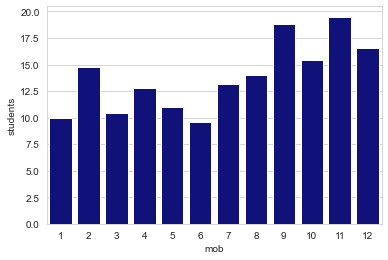

In [66]:
sns.barplot(data=agg, x='mob', y='students', color='DarkBlue', ci=False)

In [71]:
agg_pivot = agg.pivot_table(values='students', index='mob', columns='exam_year')
agg_pivot

exam_year,2012,2013,2014,2016,2021
mob,,,,,
1,7.0,6.0,5.0,30.0,2.0
2,7.0,5.0,7.0,52.0,3.0
3,6.0,4.0,5.0,33.0,4.0
4,11.0,6.0,5.0,36.0,6.0
5,5.0,8.0,8.0,31.0,3.0
6,4.0,5.0,7.0,28.0,4.0
7,10.0,11.0,13.0,29.0,3.0
8,8.0,7.0,4.0,49.0,2.0
9,18.0,6.0,10.0,56.0,4.0


array([[<AxesSubplot:title={'center':'2012'}, xlabel='mob'>,
        <AxesSubplot:title={'center':'2013'}, xlabel='mob'>,
        <AxesSubplot:title={'center':'2014'}, xlabel='mob'>],
       [<AxesSubplot:title={'center':'2016'}, xlabel='mob'>,
        <AxesSubplot:title={'center':'2021'}, xlabel='mob'>,
        <AxesSubplot:xlabel='mob'>]], dtype=object)

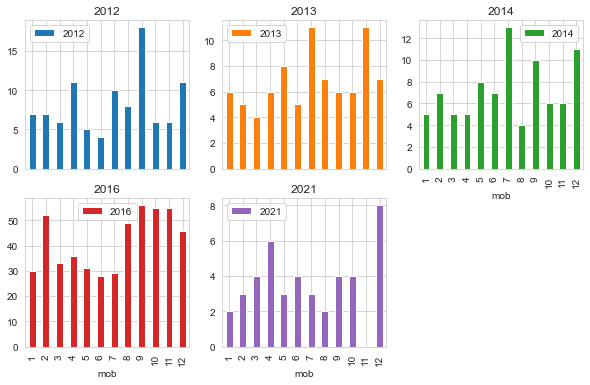

In [73]:
agg_pivot.plot(kind='bar', subplots=True, layout=(2,3), figsize=(10,6))